In [4]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4556\486238426.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
from konlpy.corpus import kolaw

In [6]:
# data = kolaw.open("constitution.txt").read()

import pymysql

DB_HOST = 'localhost'
DB_USER = 'pyuser'
DB_PASSWD = 'pyuser'
DB_NAME = 'pyuser'

conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWD,
                   db=DB_NAME, charset='utf8')
curs = conn.cursor()
sql = """
    select blog_content from lotte_blog
    where blog_date between '20200101' and '20201231'
"""
curs.execute(sql)
data_table = curs.fetchall() 
conn.close()

import pandas as pd
data = pd.DataFrame(data_table,columns=['Contents'])


In [7]:
from konlpy.tag import Komoran
komoran = Komoran()

In [8]:
print(komoran.nouns("%r"%data[0:1000]))

['신도림', '역', '디큐브아트센터', '롯데시네마', '길', '오늘', '롯데시네마', '선정', '소식', '천호', '롯데시네마', '맛집', '만', '양', '꼬치', '제가', '천호', '롯데', '용인', '스팀', '세차', '용인', '실내', '세차', '두꺼비', '스팀', '세차', '역', '북', '롯데시네마', '용인', '스팀', '세차', '잘', '곳', '겨울왕국', '자막', '롯데시네마', '월드', '타워', '수', '관', '관람', '롯데시네마', '주아라', '점', '오늘', '예약', '사람', '밖', '모바일', '티켓', '수령', '불가', '롯데시네마', '기', '간', '2월 12일', '수', '저번', '주 주', '말', '프로그램', '김해', '롯데시네마', '대관', '닥터', '두리틀', '관람', '위너스', '정관', '안녕하세요', '롯데시네마', '닥터', '두리틀', '얼', '리', '버드', '1+1', '예', '매', '이벤트', '원주', '맛집', '무실동', '샤브샤브', '전문점', '촌', '점심', '특선']


In [9]:
word_list = komoran.nouns("%r"%data[0:1000])

In [10]:
text = ' '.join(word_list)

In [11]:
text

'신도림 역 디큐브아트센터 롯데시네마 길 오늘 롯데시네마 선정 소식 천호 롯데시네마 맛집 만 양 꼬치 제가 천호 롯데 용인 스팀 세차 용인 실내 세차 두꺼비 스팀 세차 역 북 롯데시네마 용인 스팀 세차 잘 곳 겨울왕국 자막 롯데시네마 월드 타워 수 관 관람 롯데시네마 주아라 점 오늘 예약 사람 밖 모바일 티켓 수령 불가 롯데시네마 기 간 2월 12일 수 저번 주 주 말 프로그램 김해 롯데시네마 대관 닥터 두리틀 관람 위너스 정관 안녕하세요 롯데시네마 닥터 두리틀 얼 리 버드 1+1 예 매 이벤트 원주 맛집 무실동 샤브샤브 전문점 촌 점심 특선'

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
!pip3 install wordcloud

In [15]:
from wordcloud import WordCloud

In [16]:
wordc = WordCloud()
wordc.generate(text)

In [36]:
# plt.imshow(wordc)
# plt.show()

(-0.5, 399.5, 199.5, -0.5)

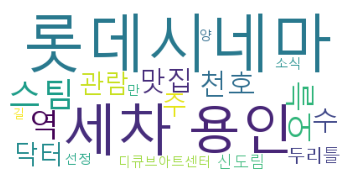

In [18]:
wordc = WordCloud(background_color="white", max_words=20,
                  relative_scaling=0.2,
                  font_path="C:/Windows/Fonts/malgun.ttf")
wordc.generate(text)
plt.figure()
plt.imshow(wordc)
plt.axis("off")

In [19]:
word_list = komoran.nouns("%r"%data)

In [20]:
text = ' '.join(word_list)

In [21]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      relative_scaling=0.2,
                      font_path="C:/Windows/Fonts/malgun.ttf")

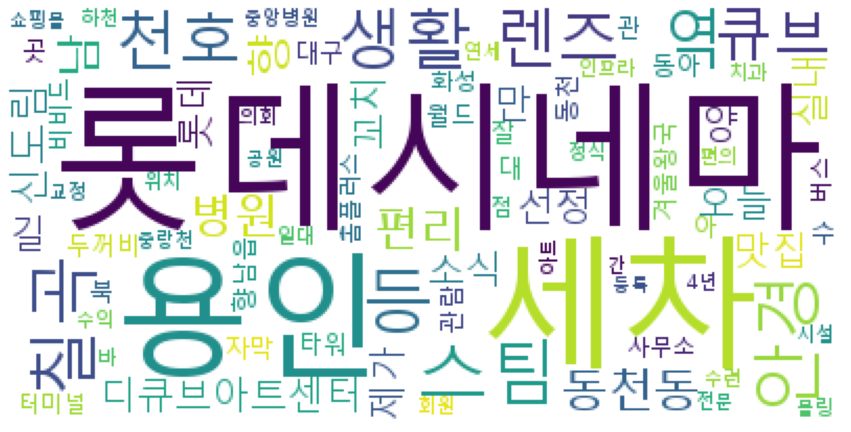

In [22]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

# set 다음에 제거할 명사 입력
stow_w = STOPWORDS | ENGLISH_STOP_WORDS | set(["롯데시네마","세차"])

In [38]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      stopwords=stow_w,
                      relative_scaling=0.2,
                      font_path="C:/Windows/Fonts/malgun.ttf")

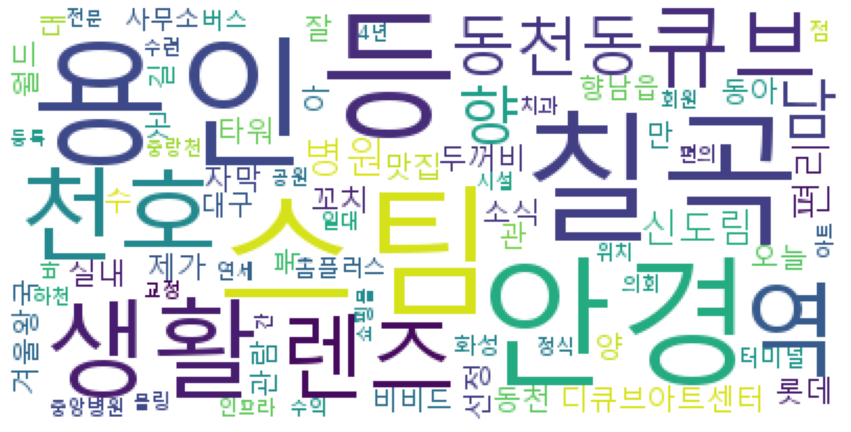

In [39]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
import numpy as np
from PIL import Image
img = Image.open("snowman.png").convert("RGBA")
mask_ar = np.array(img)

In [44]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

# set 다음에 제거할 명사 입력
stow_w = STOPWORDS | ENGLISH_STOP_WORDS | set(["용인","칠곡"])

In [45]:
wordcloud = WordCloud(background_color="white",
                      max_words=2000,
                      stopwords=stow_w,
                      font_path="C:/windows/Fonts/malgun.ttf",
                      mask=mask_ar, random_state=42)

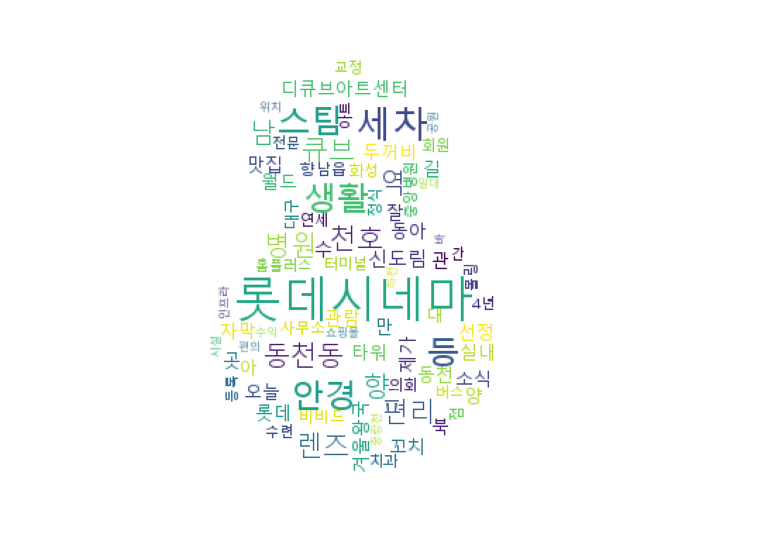

In [46]:
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud.to_file("result1.png")   # 이미지로 저장하기

In [31]:
import random
def grey_color(*args, **kwargs):
    return 'hsl(40, 100%%, %d%%)'% random.randint(50,100)

In [ ]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS

# set 다음에 제거할 명사 입력
stow_w = STOPWORDS | ENGLISH_STOP_WORDS | set(["롯데시네마","세차"])

In [32]:
wordcloud = WordCloud(background_color="black",
                      max_words=2000,
                      stopwords=stow_w,
                      font_path="C:/windows/Fonts/malgun.ttf",
                      mask=mask_ar, random_state=42)

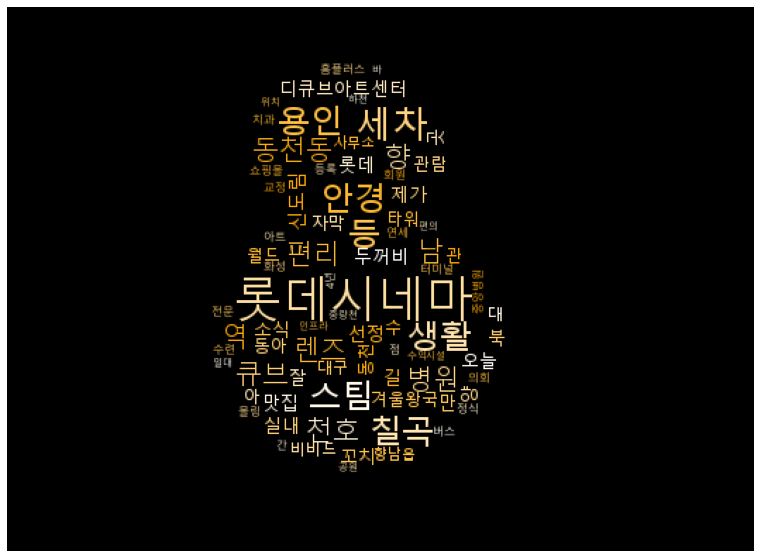

In [33]:
wordcloud.generate(text)
wordcloud.recolor(color_func=grey_color)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# wordcloud.to_file("result2.png")

# 단어갯수분포 보기

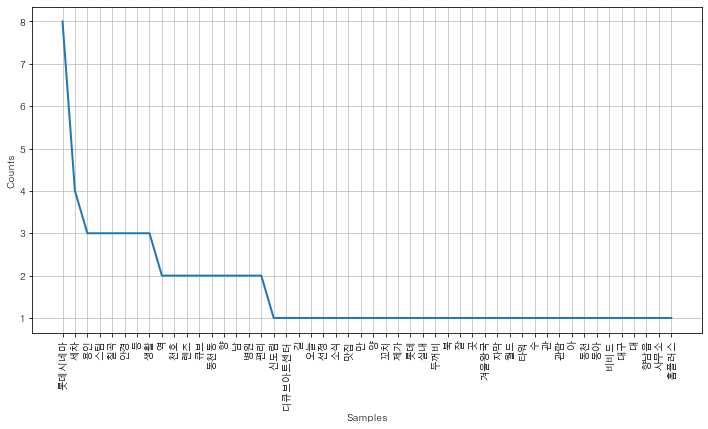

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
import nltk
import matplotlib.font_manager as fm
plt.figure(figsize=(12,6))
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
nltk.Text(word_list).plot(50)

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

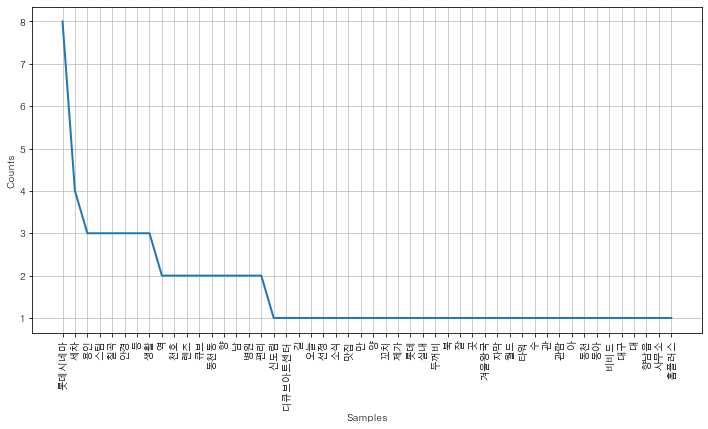

In [35]:
# 이미지로 저장하기
from matplotlib import pylab
plt.show = lambda: pylab.savefig('word_count.png')

plt.figure(figsize=(12,6))
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
nltk.Text(word_list).plot(50)